In [1]:
%load_ext autoreload
%autoreload 2
from generators import DiagBooleanMatrix
from models import Asso
from utils import show_matrix

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap      : [0.2 0.1 0.2 0.1]
[I] seed         : 1694424889


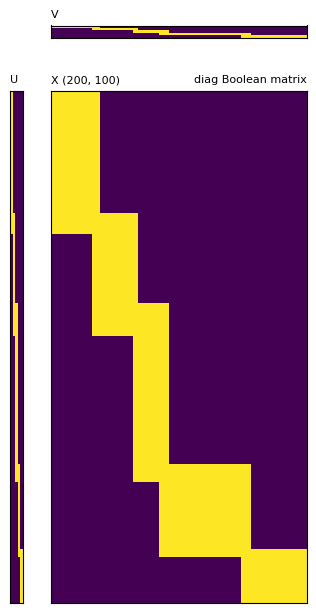

In [6]:
n_row=200
n_col=100
k=5
noise=[0.5, 0.1]
overlap=[0.2, 0.1, 0.2, 0.1]

m = DiagBooleanMatrix(m=n_row, n=n_col, k=k, overlap=overlap)
m.generate()

settings = [(m.U, [1, 0], "U"),
            (m.V, [0, 1], "V"),
            (m.X, [1, 1], "X " + str(m.X.shape))]
show_matrix(settings=settings, scaling=0.5, title="diag Boolean matrix")

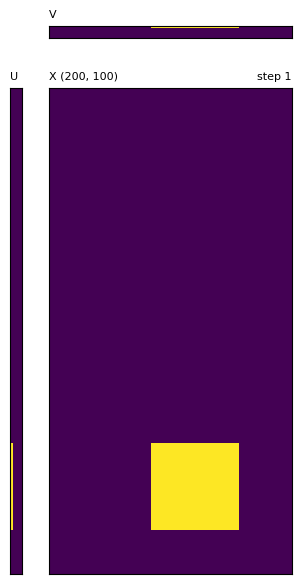

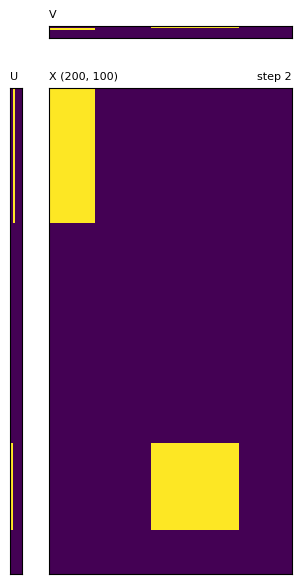

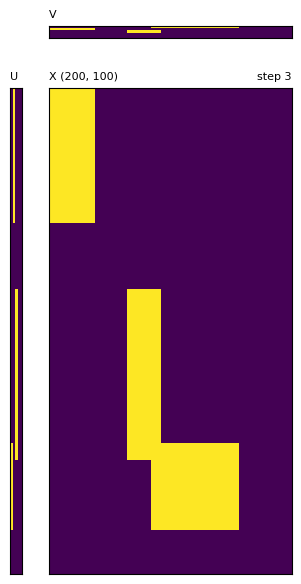

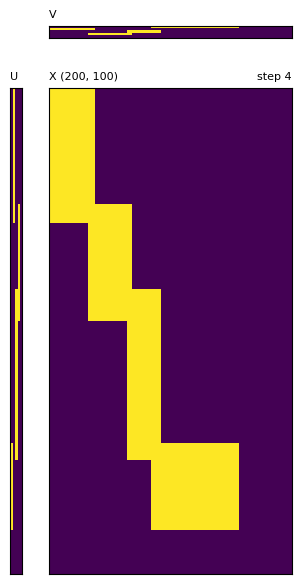

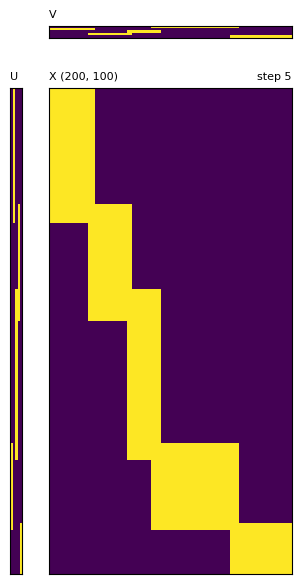

In [13]:
m.to_sparse()
asso = Asso(X=m.X_sparse, k=k, tau=0.5, w=[0.5, 0.5], display_flag=True, U_idx=m.U_idx, V_idx=m.V_idx)
asso.solve()

[I] Using RandomState
[I] Using RandomState


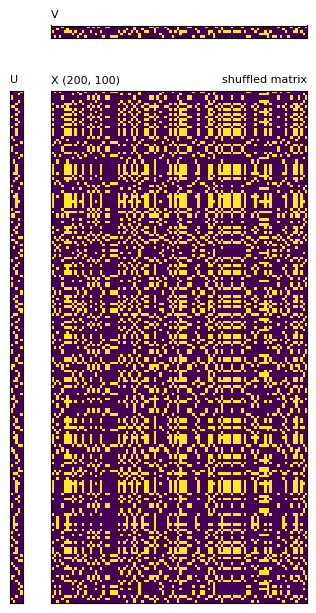

In [11]:
m.shuffle()

settings = [(m.U, [1, 0], "U"),
            (m.V, [0, 1], "V"),
            (m.X, [1, 1], "X " + str(m.X.shape))]
show_matrix(settings=settings, scaling=0.5, title="shuffled matrix")

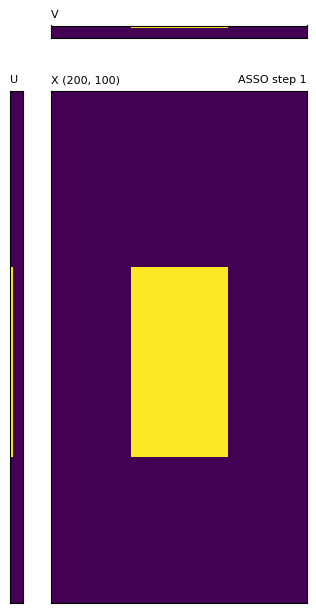

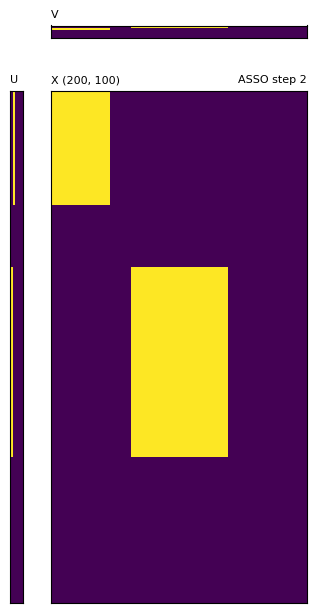

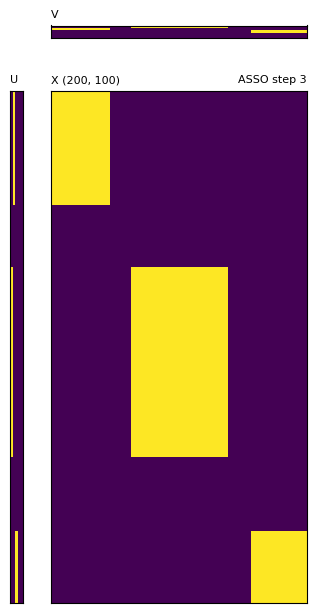

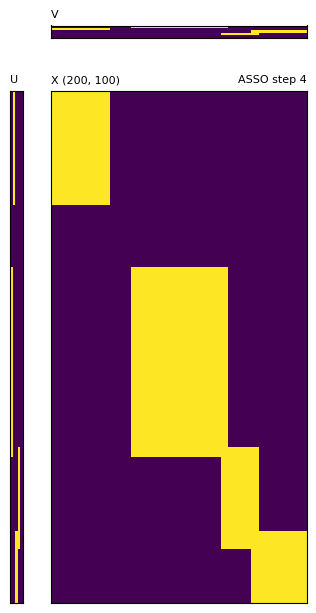

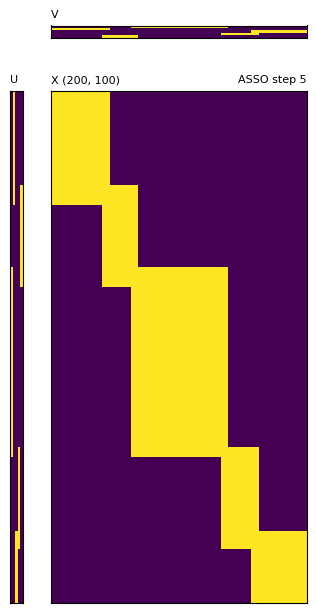

In [12]:
asso = Asso(X=m.X, k=k, tau=0.5, w=[0.5, 0.5], display_flag=True, U_idx=m.U_idx, V_idx=m.V_idx)
asso.solve()

[I] noise        : [0.5 0.1]
[I] Using RandomState


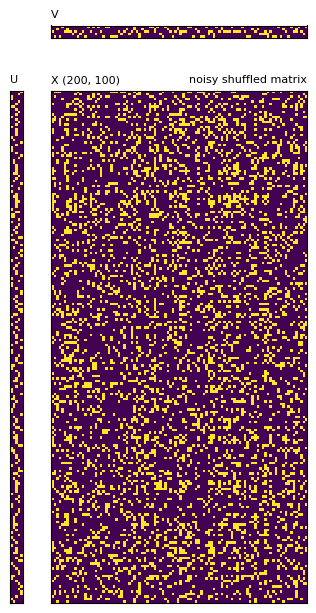

In [13]:
m.add_noise(noise=noise)

settings = [(m.U, [1, 0], "U"),
            (m.V, [0, 1], "V"),
            (m.X, [1, 1], "X " + str(m.X.shape))]
show_matrix(settings=settings, scaling=0.5, title="noisy shuffled matrix")

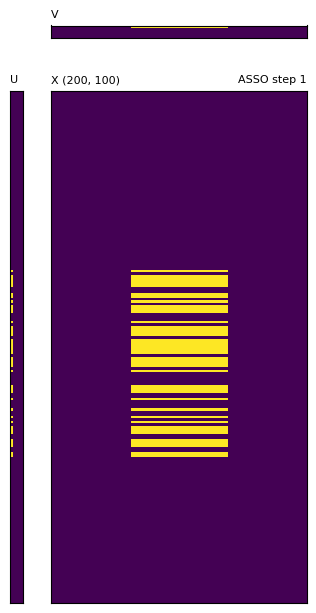

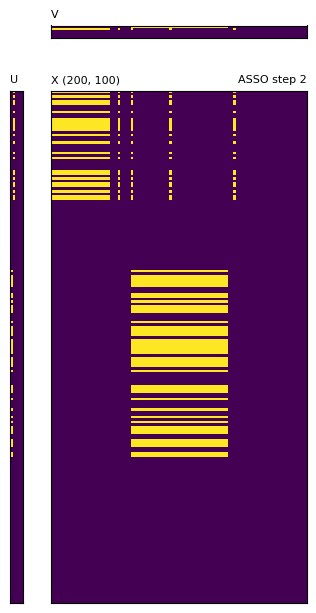

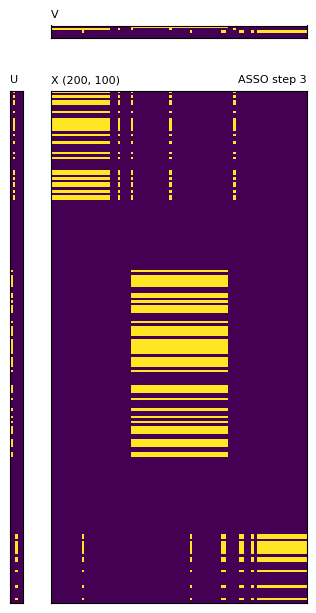

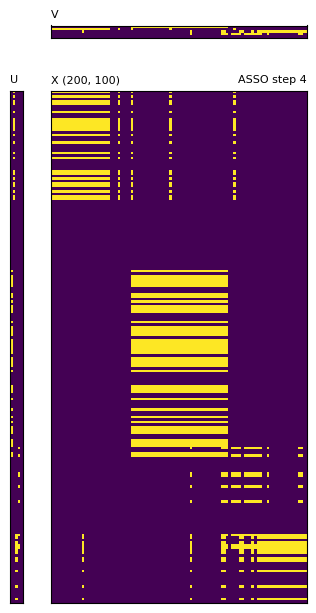

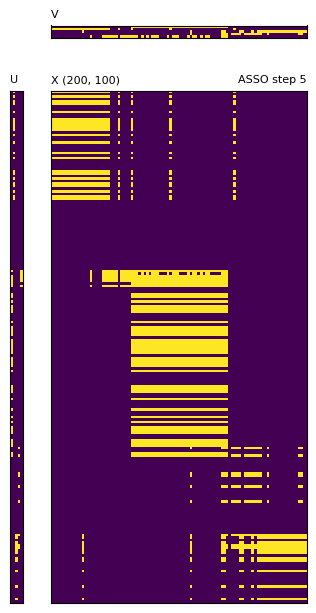

In [18]:
asso = Asso(X=m.X, k=k, tau=0.25, w=[0.5, 0.5], display_flag=True, U_idx=m.U_idx, V_idx=m.V_idx)
asso.solve()